# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from math import sqrt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [2]:
!python3 --version


Python 3.7.11


In [3]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
print(X.shape)
print(type(X))

(5000, 400)
<class 'numpy.ndarray'>


In [5]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

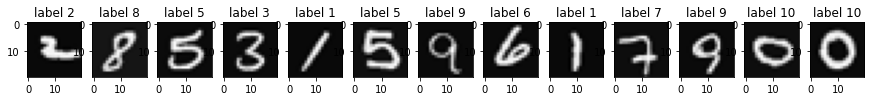

In [6]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de conusion

In [16]:
"""
class Matrice_Confusion:
    
    def __init__(self):

"""

def Matrice_Confusion(y_test,y_predict):
    
    if len(np.unique(y_test))>len(np.unique(y_predict)):
        nb_classe = len(np.unique(y_test))
    else: nb_classe = len(np.unique(y_predict))
    
    matrice = np.zeros((nb_classe+1,nb_classe+1), dtype=int).tolist()
    
    for i in range(len(y_test)):
            
        matrice[y_test[i]][y_predict[i]] += 1
        
    return matrice


[-1  1  2  3  4  5 11 12]
8
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
0


- Rappel


In [ ]:
def Rappel(MatCon):
    taille = len(MatCon)
    
    t_rappel = np.zeros(11).tolist()
    
    for j in range(taille):
        x = MatCon[i][i]
        for i in range(taille):
            if(i!=j):
                y +=MatCon[i][j] 
                
        
        try:
            t_rappel[i] = x/(x+y)
        except: t_rappel[i] = 0
    
     

- Précision

In [ ]:
def Precision(MatCon):
    taille = len(MatCon)
    
    t_Precision = np.zeros(11).tolist()
    
    for i in range(taille):
        x = MatCon[i][i]
        for j in range(taille):
            if(i!=j):
                y +=MatCon[i][j] 
                
        
        try:
            t_Precision[i] = x/(x+y)
        except: t_Precision[i] = 0

- Taux de FP

- Spécificité

- Courbe ROC

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [29]:
tRatio=2/3
ttRatio=1/3
# implementer la division

Xtrain_set,Xtest_set, Ytrain_set,Ytest_set = train_test_split(X,Y,train_size=(2/3),test_size=(1/3))

In [30]:
Xtrain_set.shape

(3333, 400)

In [31]:
Ytrain_set.shape

(3333,)

In [32]:
Xtest_set.shape

(1667, 400)

In [33]:
Ytest_set.shape

(1667,)

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [67]:

def Difference(X,Y):
    return int(((X-Y)**2).sum())
    
def selectF(elem):
    return elem[1]

def KPP(x,Xt, Yt,k=21):
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt
    
    list_n = []
    list_etique = np.zeros(11, dtype=int).tolist()
    
    for i in range(Xt.shape[0]):
        
        if(i<k):
            list_n.append((Yt[i],Difference(x,Xt[i])))
            list_n.sort(key=selectF)
        else:
            if list_n[len(list_n)-1][1]>Difference(x,Xt[i]):
                list_n.pop()
                list_n.append((Yt[i],Difference(x,Xt[i])))
                list_n.sort(key=selectF)
    
    for i in range(k):
        list_etique[list_n[i][0]]+=1
        
    
    return list_etique.index(max(list_etique))

In [68]:
vrai = np.zeros(11, dtype=int).tolist()
faux = np.zeros(11, dtype=int).tolist()

for i in range(Xtest_set.shape[0]):
    predict = KPP(Xtest_set[i],Xtrain_set,Ytrain_set)
    if(predict == Ytest_set[i]):
        vrai[predict]+=1
    else:
        faux[predict]+=1

In [74]:
print(vrai)
print(f"Pourcentage de vrai:{((sum(vrai)/Xtest_set.shape[0])*100)}% ")

print(faux)
print(f"Pourcentage de Faux:{((sum(faux)/Xtest_set.shape[0])*100)}% ")

[0, 171, 149, 155, 156, 140, 156, 143, 131, 164, 164]
Pourcentage de vrai:91.72165566886623% 
[0, 33, 3, 14, 9, 12, 15, 13, 6, 25, 8]
Pourcentage de Faux:8.278344331133773% 


Le vrai : 7, Predit: 7


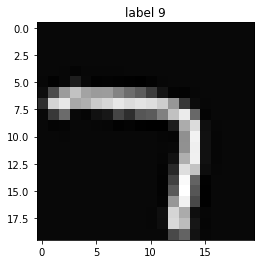

In [77]:
choix = 15
print(f"Le vrai : {Ytest_set[choix]}, Predit: {KPP(Xtest_set[choix],Xtrain_set,Ytrain_set)}")

a = Xtest_set[choix].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Y[c]))
plt.imshow(a,cmap='gray')

# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

In [ ]:
# Choisir un image de test 
c=0

In [ ]:
model.predict([Xtt[c,:]])

In [ ]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

Afficher l'image testée

In [ ]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [ ]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


# Appliquer les métriques implementées pour voir le résultat

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 4 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

In [ ]:
# bonne chance

ERROR! Session/line number was not unique in database. History logging moved to new session 23
